In [1]:
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'bone_data/train'
data_dir = pathlib.Path(file_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['fractured' 'not fractured']


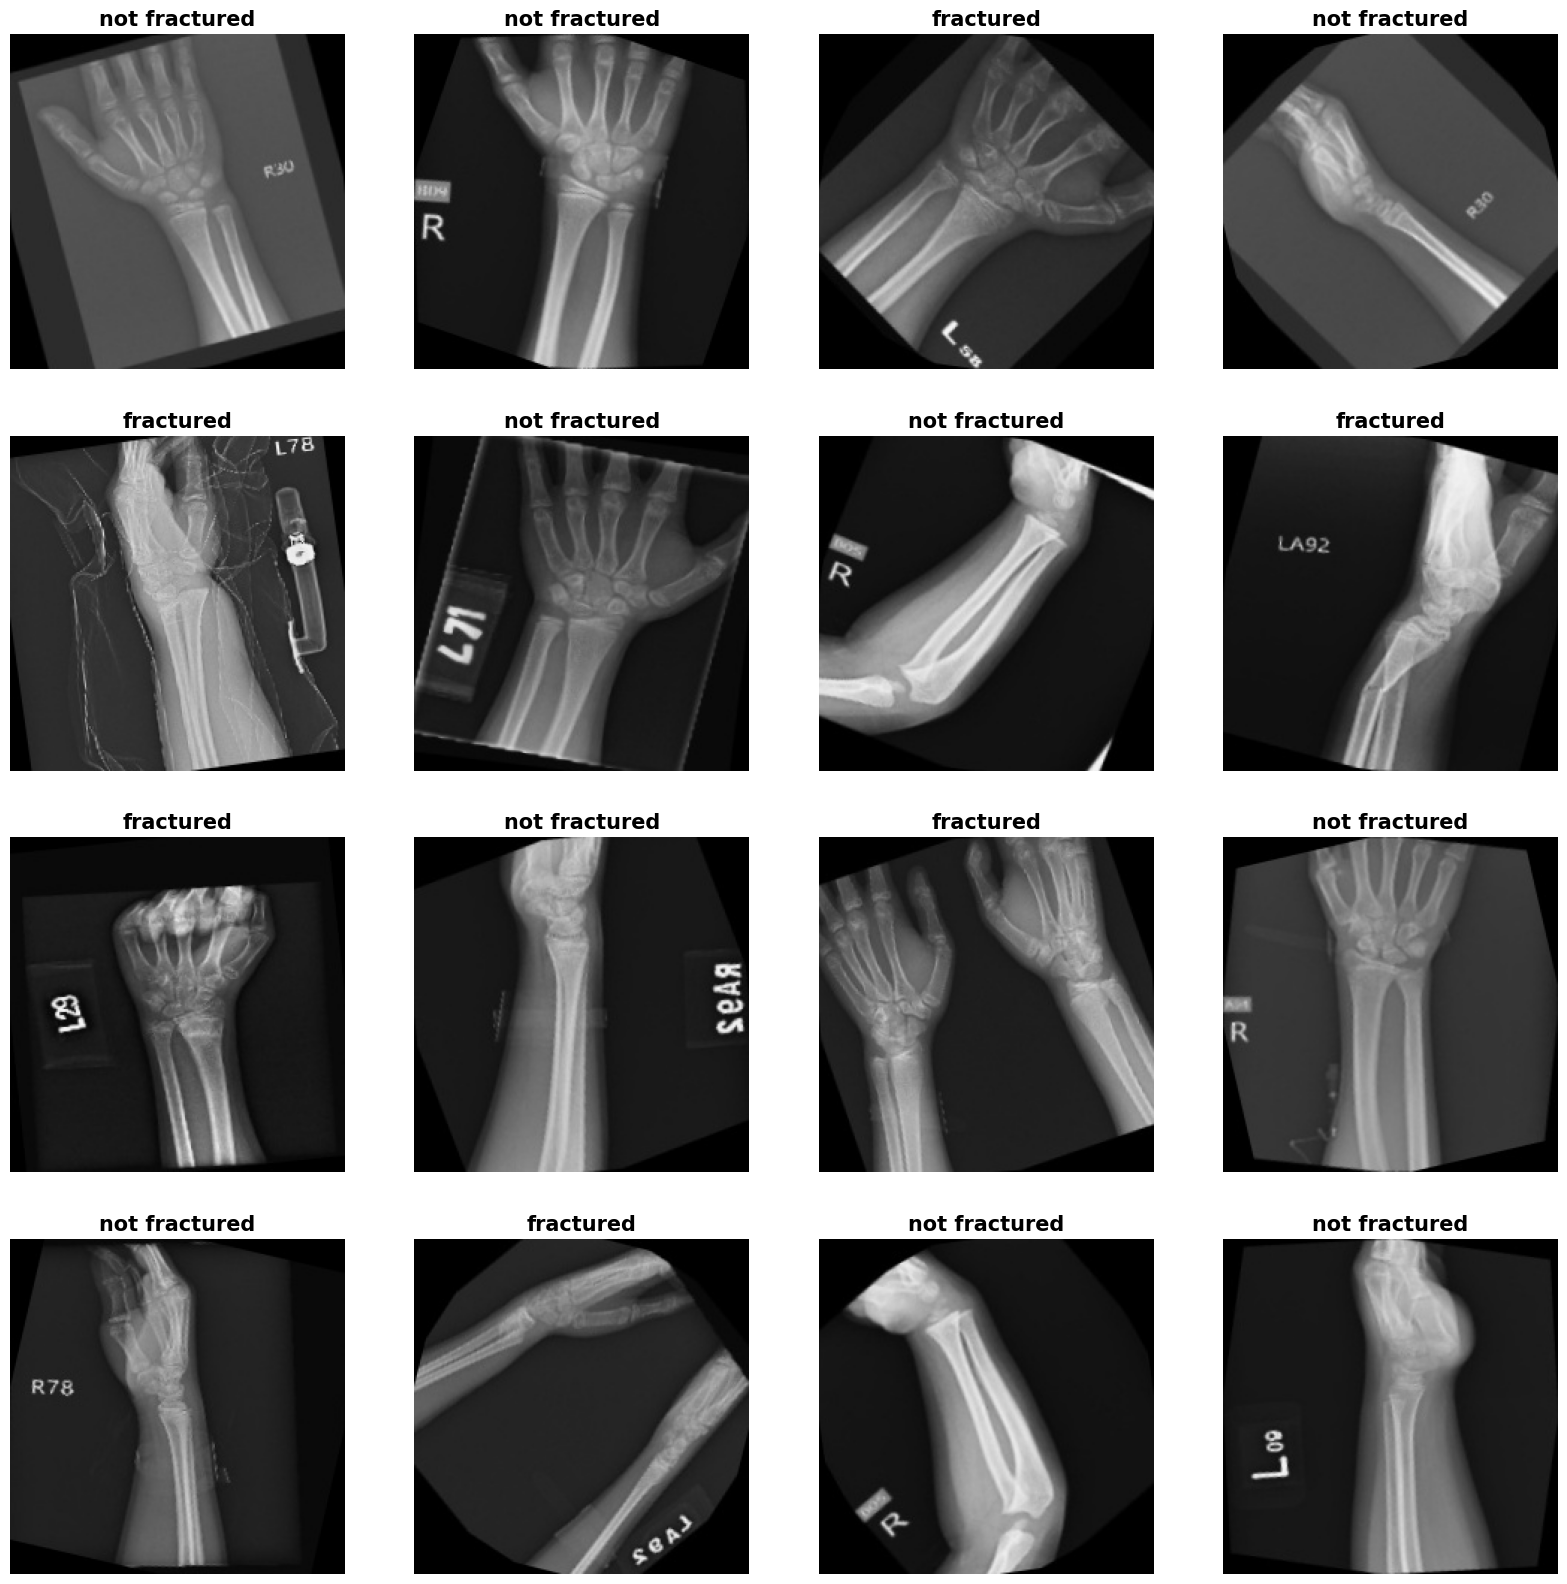

In [3]:
plt.figure(figsize=(20, 20)) 
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    random_class = random.randint(0,1)
    folder_path = file_path + '/' + class_names[random_class]
    random_image_path = folder_path + '/' + (random.sample(os.listdir(folder_path), 1)[0])
    image = plt.imread(random_image_path)
    plt.axis('off')
    plt.title(class_names[random_class], fontsize = 15, fontweight = 'bold')
    plt.imshow(image)

In [4]:
SEED = 1   # maybe can do with random seed generator and compare results with different seed values in the future.
BATCH_SIZE = 32
IMG_SIZE = (128, 128)

X_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'training'
)


Found 8863 files belonging to 2 classes.
Using 7091 files for training.


In [5]:

X_validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'validation'
)


Found 8863 files belonging to 2 classes.
Using 1772 files for validation.


In [6]:
INPUT_SHAPE = IMG_SIZE + (3,)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(scale=1./255, input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')) #layer 1
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')) #layer 2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')) #layer 3
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.20)) 
model.add(tf.keras.layers.Flatten())                  #flattend layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation = 'softmax')) #output layer

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [7]:
history = model.fit(X_train, epochs = 5, validation_data=X_validation, verbose=1)

Epoch 1/5
222/222 [==============================] - 142s 625ms/step - loss: 0.5358 - accuracy: 0.7244 - val_loss: 0.3529 - val_accuracy: 0.8600
Epoch 2/5
222/222 [==============================] - 139s 626ms/step - loss: 0.2226 - accuracy: 0.9106 - val_loss: 0.1046 - val_accuracy: 0.9616
Epoch 3/5
222/222 [==============================] - 143s 641ms/step - loss: 0.0836 - accuracy: 0.9724 - val_loss: 0.0740 - val_accuracy: 0.9797
Epoch 4/5
222/222 [==============================] - 141s 632ms/step - loss: 0.0308 - accuracy: 0.9896 - val_loss: 0.0626 - val_accuracy: 0.9786
Epoch 5/5
222/222 [==============================] - 147s 659ms/step - loss: 0.0348 - accuracy: 0.9876 - val_loss: 0.0479 - val_accuracy: 0.9859


In [8]:
model_evaluate = model.evaluate(X_validation)
print("Accuracy: %", "{:.2f}".format(model_evaluate[1]*100))
print("Loss: %", "{:.2f}".format(model_evaluate[0]*100))

56/56 [==============================] - 11s 191ms/step - loss: 0.0479 - accuracy: 0.9859
Accuracy: % 98.59
Loss: % 4.79


[]

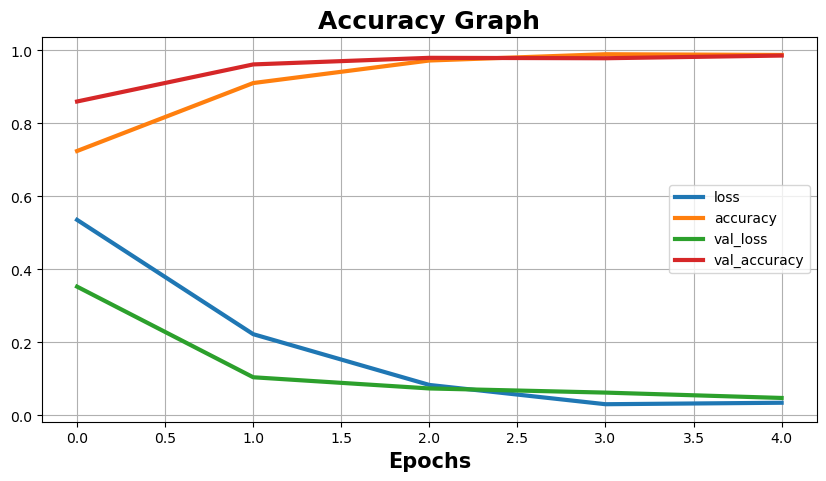

In [16]:
df = pd.DataFrame(history.history)
ax = df.plot(figsize=(10,5), lw=3, grid='on')
ax.set_title('Accuracy Graph', fontsize=18, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=15, fontweight='bold')
ax.plot()

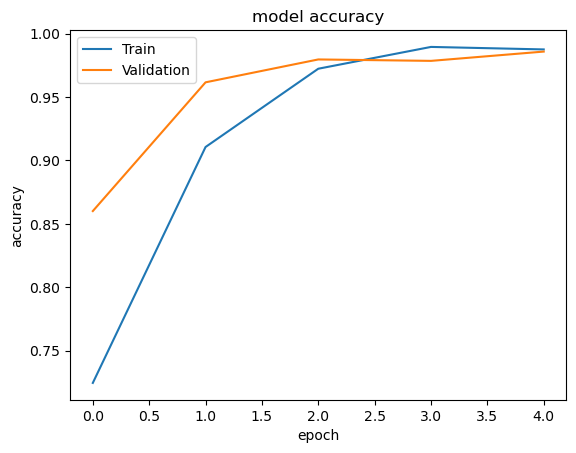

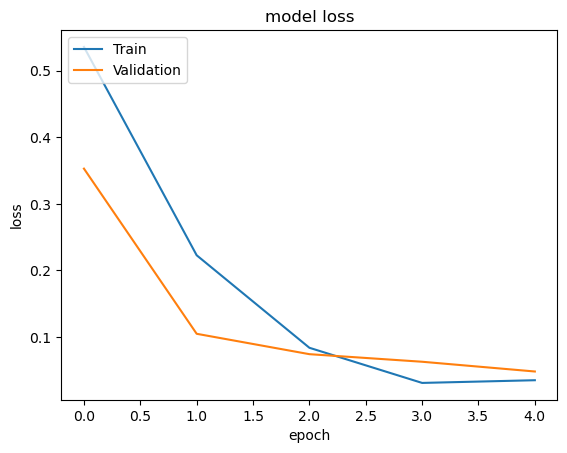

In [10]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 49ms/step


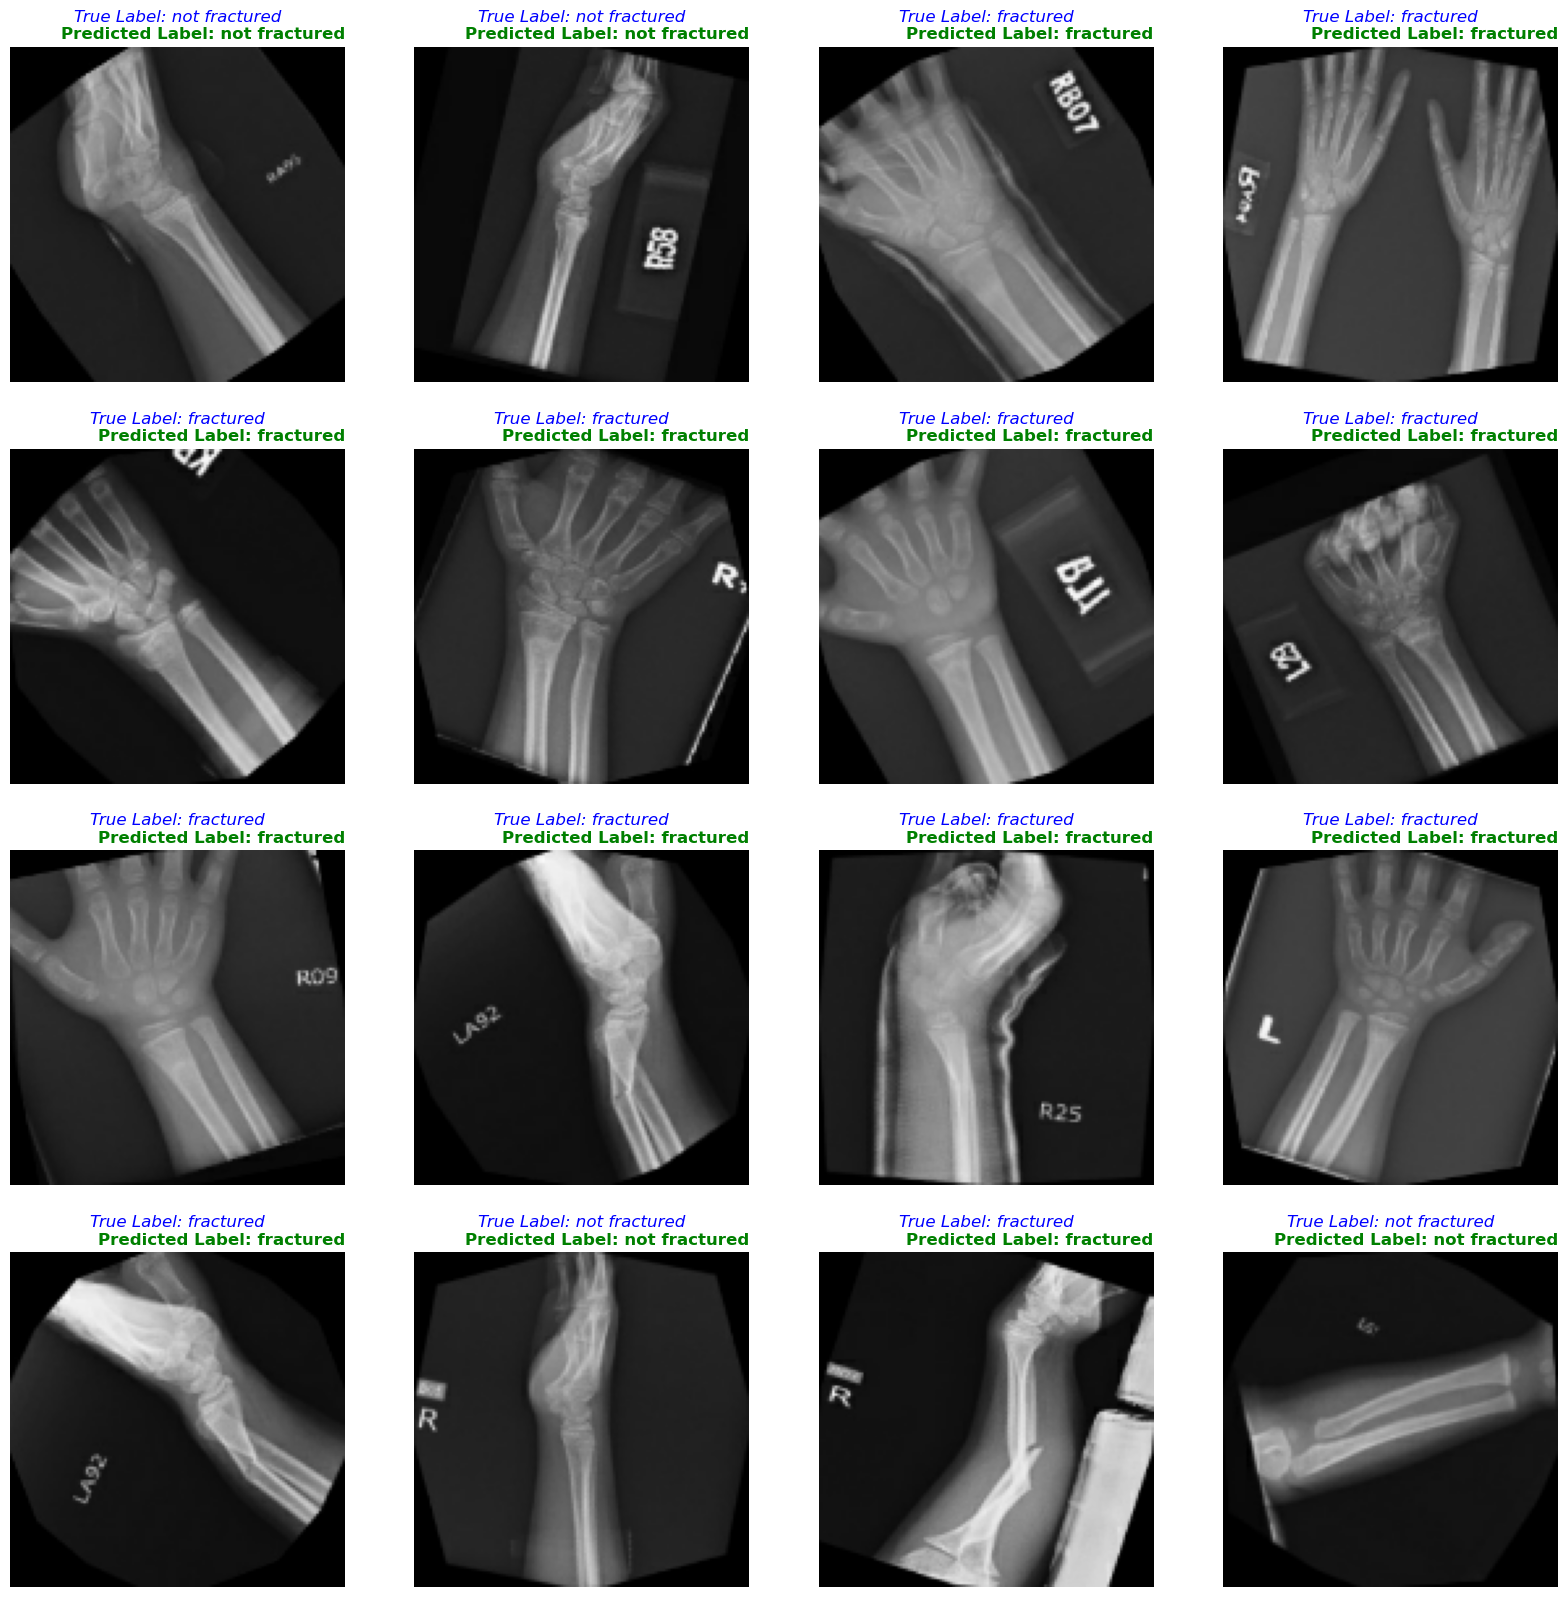

In [11]:
plt.figure(figsize=(20, 20))
for image, label in X_validation.take(1): 
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        img = image[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predicted_class = np.argmax(model.predict(img))
        plt.axis('off')
        plt.title("True Label: " + class_names[label[i]]+'\n', fontsize=12, style='italic', color='blue', loc='center')
        plt.title("Predicted Label: " + class_names[predicted_class], fontsize=12, fontweight='bold', color='green', loc='right')
        plt.imshow(image[i].numpy().astype("uint8"))

In [23]:
actual=[]
predicted=[]
for image, label in X_validation.take(1): 
    for i in range(len(image)):
        img = image[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predicted_class = np.argmax(model.predict(img))
        actual.append(class_names[label[i]])
        predicted.append(class_names[predicted_class])
print(actual)
print(predicted)

1/1 [==============================] - 0s 48ms/step
['fractured', 'not fractured', 'fractured', 'not fractured', 'not fractured', 'fractured', 'not fractured', 'fractured', 'fractured', 'fractured', 'not fractured', 'fractured', 'not fractured', 'fractured', 'not fractured', 'not fractured', 'fractured', 'not fractured', 'fractured', 'fractured', 'not fractured', 'fractured', 'not fractured', 'not fractured', 'fractured', 'fractured', 'fractured', 'not fractured', 'not fractured', 'not fractured', 'not fractured', 'not fractured']
['fractured', 'not fractured', 'fractured', 'not fractured', 'not fractured', 'fractured', 'not fractured', 'fractured', 'fractured', 'fractured', 'not fractured', 'fractured', 'not fractured', 'fractured', 'not fractured', 'not fractured', 'fractured', 'not fractured', 'fractured', 'fractured', 'not fractured', 'fractured', 'not fractured', 'not fractured', 'fractured', 'fractured', 'fractured', 'not fractured', 'not fractured', 'not fractured', 'not fractur

In [25]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(actual, predicted))

               precision    recall  f1-score   support

    fractured       1.00      1.00      1.00        15
not fractured       1.00      1.00      1.00        17

     accuracy                           1.00        32
    macro avg       1.00      1.00      1.00        32
 weighted avg       1.00      1.00      1.00        32



In [29]:
import seaborn as sns
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

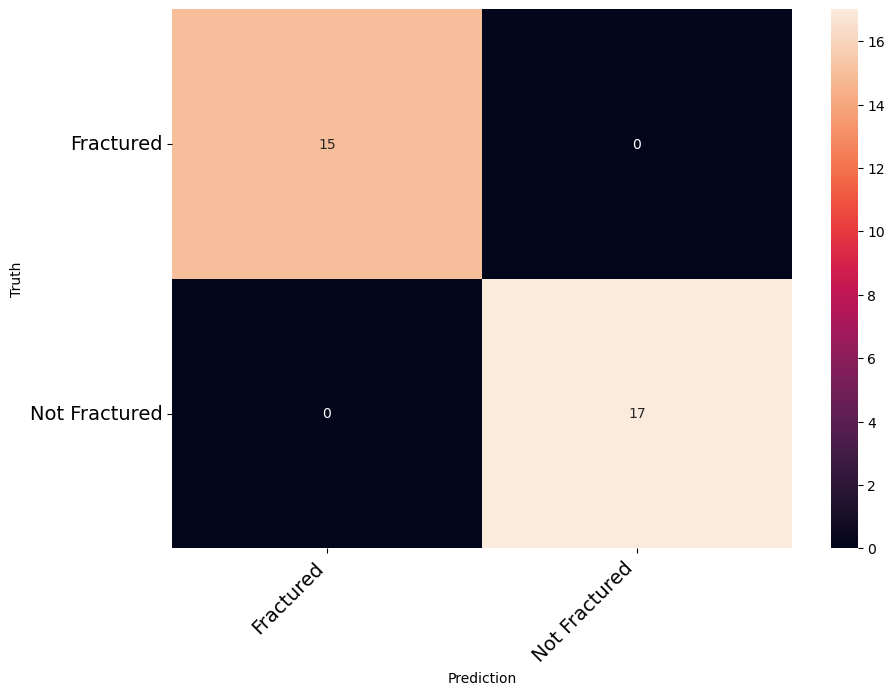

In [30]:
cm = confusion_matrix(actual, predicted)
print_confusion_matrix(cm,["Fractured","Not Fractured"])

In [12]:
model.save('fracture.h5')
print('Model Saved!')

Model Saved!


In [13]:
from keras import models
import numpy as np
import keras.utils as image
model = models.load_model('fracture.h5')

In [14]:
test_image= image.load_img('bone_data/test/fractured/1.jpg',target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)

1/1 [==============================] - 0s 182ms/step
[[9.999920e-01 7.984931e-06]]


In [15]:
r=max(map(max, result))
if result[0][0]==r:
    print("Fractured")
elif result[0][1]==r:
    print("Non-Fractured")

Fractured
